<a href="https://colab.research.google.com/github/CST501-IIITKota/lab-repo-BharadwajDinesh/blob/main/Assignment_1_Bharadwaj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement 1: Data Cleaning and Exploration**

In [2]:
import kagglehub

path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'new-york-city-airbnb-open-data' dataset.
Path to dataset files: /kaggle/input/new-york-city-airbnb-open-data


In [3]:
import pandas as pd


LOAD and Inspect

In [4]:
data = pd.read_csv(path + "/AB_NYC_2019.csv")

In [5]:
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
data.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


Handling Missing Values

In [9]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

In [10]:
data.drop(['last_review'], axis=1, inplace=True)

In [11]:
display(data.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

Outlier Detection and Handling:

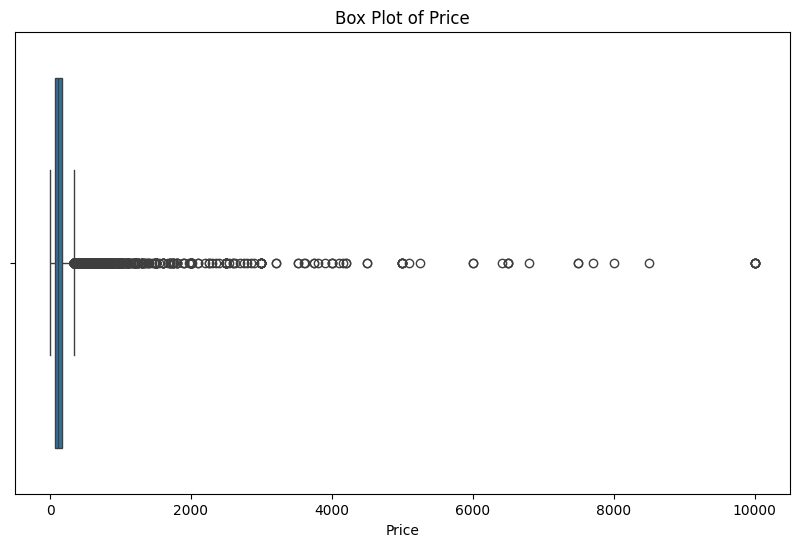

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of the price column using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()

In [13]:
# Calculating Q1, Q3, and IQR for the 'price' column
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

print(f'Q1: {Q1}')
print(f'Q3: {Q3}')
print(f'IQR: {IQR}')

Q1: 69.0
Q3: 175.0
IQR: 106.0


In [14]:
# Outliers using the IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower Bound (Outlier): {lower_bound}')
print(f'Upper Bound (Outlier): {upper_bound}')

Lower Bound (Outlier): -90.0
Upper Bound (Outlier): 334.0


In [15]:
# Create a new DataFrame that excludes these outliers from price column
cleaned_data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)].copy()


In [16]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45923 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              45923 non-null  int64  
 1   name                            45908 non-null  object 
 2   host_id                         45923 non-null  int64  
 3   host_name                       45902 non-null  object 
 4   neighbourhood_group             45923 non-null  object 
 5   neighbourhood                   45923 non-null  object 
 6   latitude                        45923 non-null  float64
 7   longitude                       45923 non-null  float64
 8   room_type                       45923 non-null  object 
 9   price                           45923 non-null  int64  
 10  minimum_nights                  45923 non-null  int64  
 11  number_of_reviews               45923 non-null  int64  
 12  reviews_per_month               45923

In [17]:
data['price'] >= lower_bound

,price
0,True
1,True
2,True
3,True
4,True
...,...
48890,True
48891,True
48892,True
48893,True


In order to handle inconsistancy in the "name" and "host_names" columns we can use the following methods.

1. Converting all the characters to lowercase.
2. Stripping the leading or ending spaces.
3. Handling missing values by either removing rows or replacing it with an unknown variable.

# **Problem Statement 2: Central Tendency and Visualization**

In [18]:
mean_price = cleaned_data['price'].mean()
print(f'Mean price: {mean_price:.2f}')

median_price = cleaned_data['price'].median()
print(f'Median price: {median_price:.2f}')

mode_price = cleaned_data['price'].mode()[0]
print(f'Mode price: {mode_price:.2f}')

Mean price: 119.97
Median price: 100.00
Mode price: 100.00


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

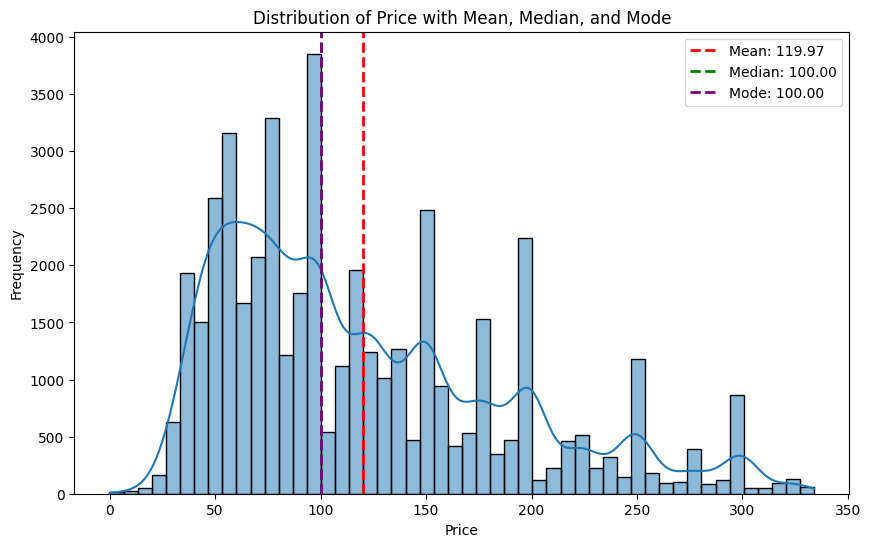

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['price'], bins=50, kde=True)

plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_price:.2f}')
plt.axvline(mode_price, color='purple', linestyle='dashed', linewidth=2, label=f'Mode: {mode_price:.2f}')

plt.title('Distribution of Price with Mean, Median, and Mode')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [21]:
mean_nor = cleaned_data['number_of_reviews'].mean()
print(f'Mean number of reviews: {mean_nor:.2f}')

median_nor = cleaned_data['number_of_reviews'].median()
print(f'Median number of reviews: {median_nor:.2f}')

mode_nor = cleaned_data['number_of_reviews'].mode()[0]
print(f'Mode number of reviews: {mode_nor:.2f}')

Mean number of reviews: 23.94
Median number of reviews: 5.00
Mode number of reviews: 0.00


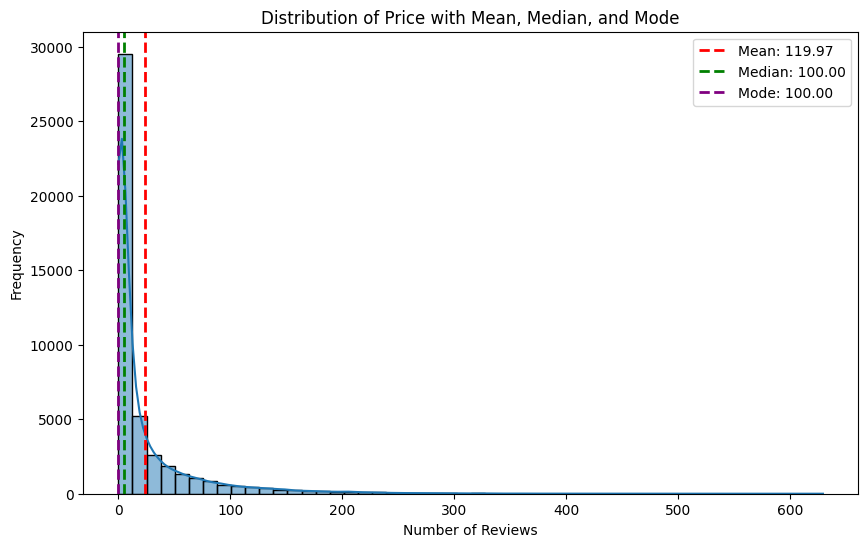

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['number_of_reviews'], bins=50, kde=True)

plt.axvline(mean_nor, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_price:.2f}')
plt.axvline(median_nor, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_price:.2f}')
plt.axvline(mode_nor, color='purple', linestyle='dashed', linewidth=2, label=f'Mode: {mode_price:.2f}')

plt.title('Distribution of Price with Mean, Median, and Mode')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.legend()
plt.show()

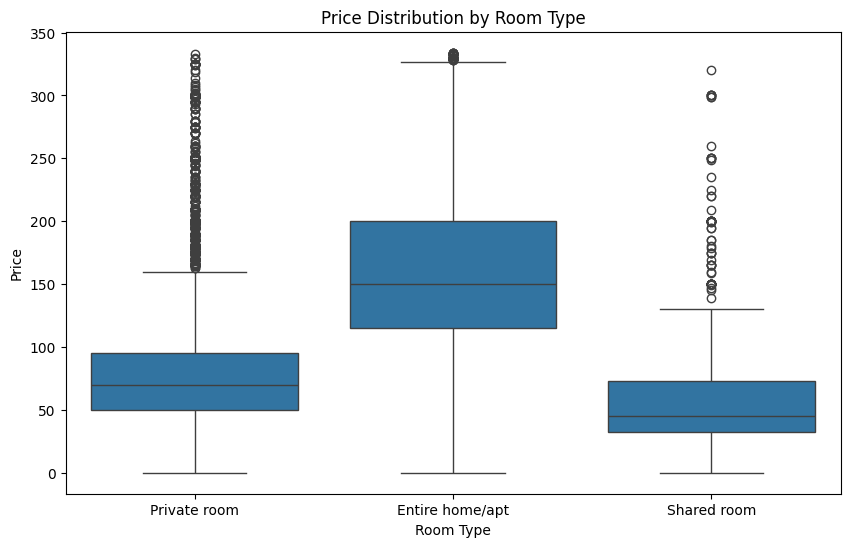

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=cleaned_data)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

Based on the box plot, we can observe the following regarding the typical price for each room type:

*   **Entire home/apt:** The box plot for 'Entire home/apt' shows a significantly higher median price and a wider interquartile range compared to the other room types. This indicates that entire homes or apartments are generally more expensive.
*   **Private room:** The box plot for 'Private room' shows a lower median price than 'Entire home/apt' but higher than 'Shared room'. The spread of prices is also narrower than 'Entire home/apt'.
*   **Shared room:** The box plot for 'Shared room' shows the lowest median price and the narrowest interquartile range. This is expected as shared rooms are typically the most budget-friendly option.

Overall, the typical price does seem to differ significantly between the 'Private room', 'Entire home/apt', and 'Shared room' categories, with 'Entire home/apt' being the most expensive and 'Shared room' being the least expensive.

# **Problem Statement 3: Sampling and the Central Limit Theorem (CLT)**

In [34]:
population = cleaned_data['calculated_host_listings_count']

In [45]:
pop_mean = population.mean()
print(f'Population Mean: {pop_mean}')

Population Mean: 6.639701239030551


<function matplotlib.pyplot.show(close=None, block=None)>

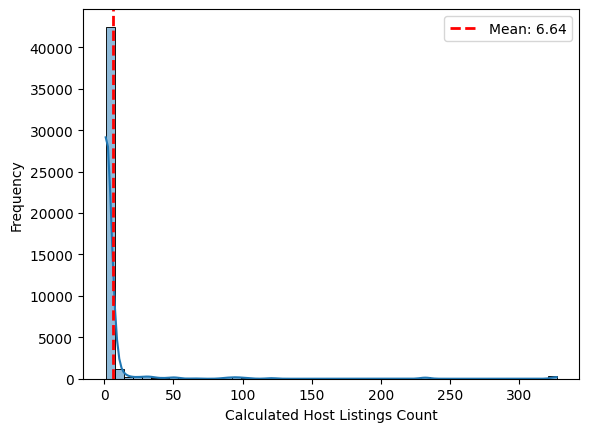

In [49]:
sns.histplot(population, bins=50, kde=True)
plt.axvline(pop_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {pop_mean:.2f}')
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Frequency')
plt.legend()
plt.show

In [ ]:
while(i<1000):


In [79]:
import random
import statistics

sample_datas_mean = []
i = 0
while(i<1000):
  sample = random.sample(population.tolist(), 50)
  statistics.mean(sample)
  sample_datas_mean.append(statistics.mean(sample))
  i+=1


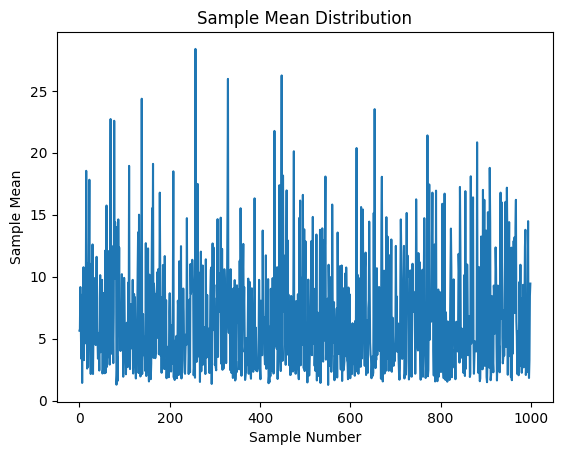

In [80]:
plt.plot(sample_datas_mean)
plt.xlabel('Sample Number')
plt.ylabel('Sample Mean')
plt.title('Sample Mean Distribution')
plt.show()

In [81]:
len(sample_datas_mean)

1000

In [83]:
mean_of_sdm = statistics.mean(sample_datas_mean)

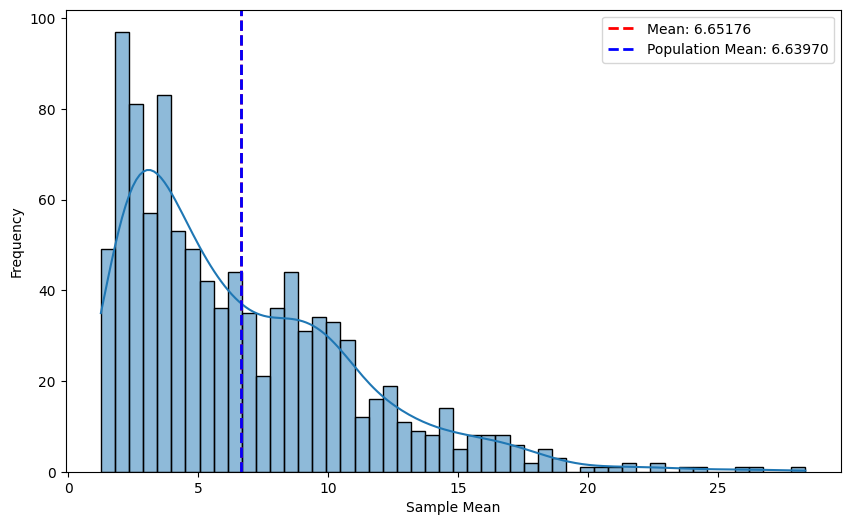

In [93]:
plt.figure(figsize=(10, 6))
sns.histplot(sample_datas_mean, bins=50, kde=True)
plt.axvline(mean_of_sdm, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_of_sdm:.5f}')
plt.axvline(pop_mean, color='blue', linestyle='dashed', linewidth=2, label=f'Population Mean: {pop_mean:.5f}')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The difference between the sample mean to pop mean is very minimal.

In [78]:
pop_mean

np.float64(6.639701239030551)

When looking at the populatio distributio it is SKEWED, not norma;;y distributed.

Where as the mean of the Samples is NORMALLY DISTRIBUTED.

Whith this example we get to see the real demonstration of CENTRAL LIMIT THEOREM.



# **Problem Statement 4: Hypothesis Testing**

Null hypothesis (H0​): There is no difference in the average price between the two boroughs.

Alternative hypothesis (Ha​): There is a difference.

In [105]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [109]:
brooklyn = data[data['neighbourhood_group'] == 'Brooklyn'].copy()
manhattan = data[data['neighbourhood_group'] == 'Manhattan'].copy()



In [111]:
brooklyn['price']

,price
0,149
3,89
6,60
12,89
15,140
...,...
48882,40
48884,190
48887,170
48890,70


In [116]:
brooklyn = data[data['neighbourhood_group'] == 'Brooklyn'].copy()
manhattan = data[data['neighbourhood_group'] == 'Manhattan'].copy()

sample_size = 100
brooklyn_sample_prices = random.sample(brooklyn['price'].tolist(), sample_size)
manhattan_sample_prices = random.sample(manhattan['price'].tolist(), sample_size)


In [112]:
from scipy import stats

In [117]:
t_statistic, p_value = stats.ttest_ind(brooklyn_sample_prices, manhattan_sample_prices)

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -1.5398
P-value: 0.1252


p-value(0.1252) < Significance level(0.05)

Hence, we reject the null hypothesis

# **Problem Statement 5: Advanced Pandas Operations**

In [138]:
Bronx_listings = cleaned_data[(cleaned_data['neighbourhood_group']=='Bronx') & (cleaned_data['price']<=100)]

In [139]:
Bronx_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
171,44096,Room with a View,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2.04,3,353
207,54626,Cozy bedroom by Yankee Stadium,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,1.45,3,323
260,63588,LL3,295128,Carol Gloria,Bronx,Clason Point,40.81309,-73.85514,Private room,90,2,0,0.00,7,349
309,71812,Condo Apartment with laundry in unit,369015,Thai,Bronx,Kingsbridge,40.87207,-73.90193,Entire home/apt,90,30,4,0.35,2,346
433,149777,Artsy 1 bedroom Apt. 20 min to 42nd Grand Cent...,716306,"Dee, Dre & Mama Shelley",Bronx,Woodlawn,40.89747,-73.86390,Entire home/apt,77,1,197,2.49,1,309


In [141]:
cleaned_data.query('neighbourhood_group == "Bronx" and price <= 100').head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
171,44096,Room with a View,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2.04,3,353
207,54626,Cozy bedroom by Yankee Stadium,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,1.45,3,323
260,63588,LL3,295128,Carol Gloria,Bronx,Clason Point,40.81309,-73.85514,Private room,90,2,0,0.00,7,349
309,71812,Condo Apartment with laundry in unit,369015,Thai,Bronx,Kingsbridge,40.87207,-73.90193,Entire home/apt,90,30,4,0.35,2,346
433,149777,Artsy 1 bedroom Apt. 20 min to 42nd Grand Cent...,716306,"Dee, Dre & Mama Shelley",Bronx,Woodlawn,40.89747,-73.86390,Entire home/apt,77,1,197,2.49,1,309


In [142]:
cleaned_data.groupby('neighbourhood_group')['room_type']

In [143]:
grouped_data = cleaned_data.groupby(['neighbourhood_group', 'room_type'])

In [147]:
# Calculate the average price and total number of reviews for each group
group_stats = grouped_data.agg(average_price=('price', 'mean'),
                               total_reviews=('number_of_reviews', 'sum'))

display(group_stats)

average_price  total_reviews
neighbourhood_group room_type                                    
Bronx               Entire home/apt     112.195592          11442
                    Private room         60.595679          16312
                    Shared room          47.254237            431
Brooklyn            Entire home/apt     148.202080         256928
                    Private room         70.283443         213217
                    Shared room          48.036496           5791
Manhattan           Entire home/apt     181.688596         209705
                    Private room         98.057700         208197
                    Shared room          75.939785          10241
Queens              Entire home/apt     131.328388          59646
                    Private room         65.732319          93349
                    Shared room          46.989691           2724
Staten Island       Entire home/apt     121.089286           5852
                    Private room         62.292553           5670
                    Shared room          57.444444             14

In [149]:
# Find the combination with the highest average price
most_expensive_combination = group_stats['average_price'].idxmax()
highest_average_price = group_stats['average_price'].max()

print(f"\nThe most expensive combination of borough and room type on average is: {most_expensive_combination}")
print(f"Highest average price: {highest_average_price:.2f}")


The most expensive combination of borough and room type on average is: ('Manhattan', 'Entire home/apt')
Highest average price: 181.69


In [151]:
def categorize_availability(days):
    if days == 0:
        return 'Low'
    elif 1 <= days <= 180:
        return 'Medium'
    else:
        return 'High'

In [152]:
cleaned_data['availability_category'] = cleaned_data['availability_365'].apply(categorize_availability)

In [154]:
cleaned_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,availability_category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,High
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,High
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,High
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,High
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,Low


In [164]:
# Check for leading/trailing whitespaces in the 'name' column
# This creates a boolean Series where True indicates presence of leading/trailing spaces
has_whitespace = cleaned_data['name'].str.strip() != cleaned_data['name']

# Count how many entries have leading/trailing whitespaces
whitespace_count = has_whitespace.sum()

print(f"Number of entries in 'name' with leading/trailing whitespaces: {whitespace_count}")

# Optionally, display the rows that have these whitespaces
if whitespace_count > 0:
    print("\nExamples of entries with leading/trailing whitespaces:")
    display(cleaned_data[has_whitespace].head())

Number of entries in 'name' with leading/trailing whitespaces: 229

Examples of entries with leading/trailing whitespaces:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,availability_category
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220,High
49,13394,Fort Greene brownstone,52335,Alexander,Brooklyn,Fort Greene,40.69142,-73.97376,Private room,80,3,135,1.16,2,192,High
53,14314,Greenpoint Place...Has It All!,56246,Jeanne,Brooklyn,Greenpoint,40.73506,-73.95392,Entire home/apt,144,2,328,2.82,1,234,High
80,18764,Cozy 2 BR in Williamsburg,72014,Lulú,Brooklyn,Williamsburg,40.71154,-73.96112,Private room,145,3,61,0.54,4,238,High
96,21456,Light-filled classic Central Park,42032,Dana,Manhattan,Upper West Side,40.79764,-73.96177,Entire home/apt,140,3,81,0.71,1,198,High


In [163]:
expression = 'review_score = (reviews_per_month * number_of_reviews) / (minimum_nights + 1)'

cleaned_data.eval(expression, inplace=True)

ValueError: Expression ((reviews_per_month) * (number_of_reviews)) / ((minimum_nights) + (np.float64(1.0))) has forbidden control characters.